In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti_faces = fetch_olivetti_faces()

In [3]:
print(olivetti_faces['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
base_images = olivetti_faces['images']
base_data = olivetti_faces['data']

W zbiorze znajduje się 400 obrazów przedstawiających 40 różnych osób (każde 10 kolejnych obrazów przedstawia jedną osobę). Weźmy więc obrazy przedstawiające pierwsze 5 osób.

In [5]:
vec = np.arange(0, 50, 10)
base_data_sample = base_data[vec]

In [6]:
def print_images(data):
    plt.figure(figsize=(20,5))
    for i, image in enumerate(data):
        plt.subplot(1, 5, i + 1)
        plt.imshow(image.reshape((64,64)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

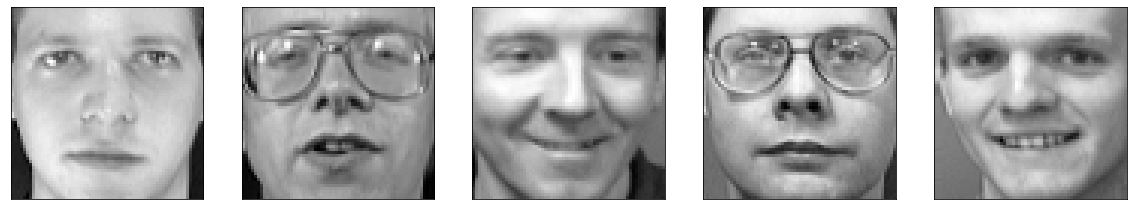

In [7]:
print_images(base_data_sample)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95, svd_solver = 'full')
pca.fit(base_data)
X = pca.transform(base_data_sample)
X.shape

(5, 123)

Już 123 składowe pozwalają na wyjaśnienie 95% wariancji.

In [9]:
CR = 4096/123 #stopień kompresji
CR

33.300813008130085

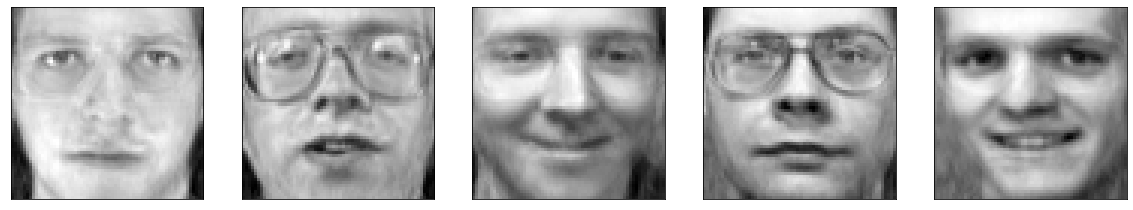

In [10]:
X_inversed = pca.inverse_transform(X)
print_images(X_inversed)

Obrazy straciły na jakości, zmniejszył się także kontrast.

In [11]:
from sklearn.metrics import mean_squared_error
RMSE = [0] * len(base_data_sample)
for i in range(len(base_data_sample)):
    RMSE[i] = mean_squared_error(base_data_sample[i], X_inversed[i], squared=False)
RMSE

[0.029931491, 0.034855843, 0.030103987, 0.036885716, 0.023945069]

In [16]:
#rozjaśnianie i przyciemnianie
light_sample = np.clip(base_data_sample+0.3, 0, 1)
dark_sample = np.clip(base_data_sample-0.3, 0, 1)

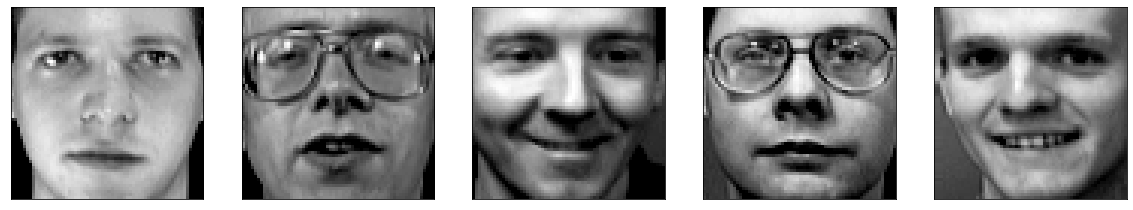

In [17]:
print_images(dark_sample)

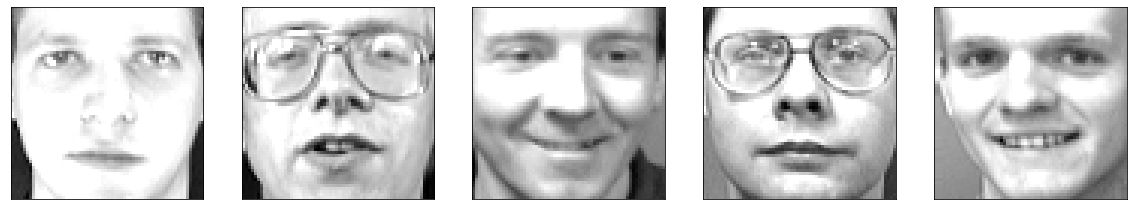

In [18]:
print_images(light_sample)